<a href="https://colab.research.google.com/github/Tanveer132/Dimensionality-Reduction-Techniques-in-ML/blob/main/FST_Practice_SVD_Application(ImageCompression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVD Application (Image Compression)

image can be compressed by varying matrix U, S, V

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##Read image using OpenCV and convert to gray

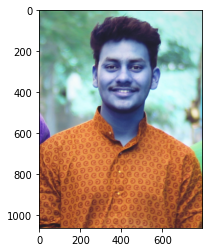

In [2]:

image=cv2.imread('/content/passport img.jpg')
plt.imshow(image)

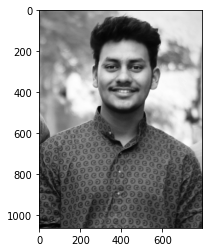

In [4]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

##Get matrices U, S, V

In [6]:
U,S,V=np.linalg.svd(gray,full_matrices=False)
print(U.shape)
print(S.shape)
print(V.shape)

(1061, 796)
(796,)
(796, 796)


##plot different blur / compressed images

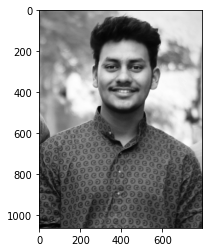

In [7]:
#To get blur image
# reduce columns of U
# reduce diagonals of S
# reduce rows of V

blur1=U[:,:] @ np.diag(S[:]) @ V[:,:]
plt.imshow(blur1,cmap="gray")

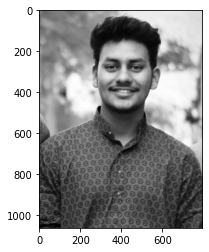

In [8]:
blur2=U[:,:600] @ np.diag(S[:600]) @ V[:600,:]
plt.imshow(blur2,cmap="gray")

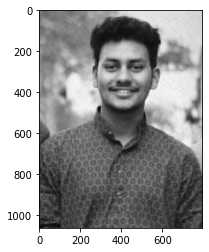

In [12]:
blur3=U[:,:50] @ np.diag(S[:50]) @ V[:50,:]
plt.imshow(blur3,cmap="gray")

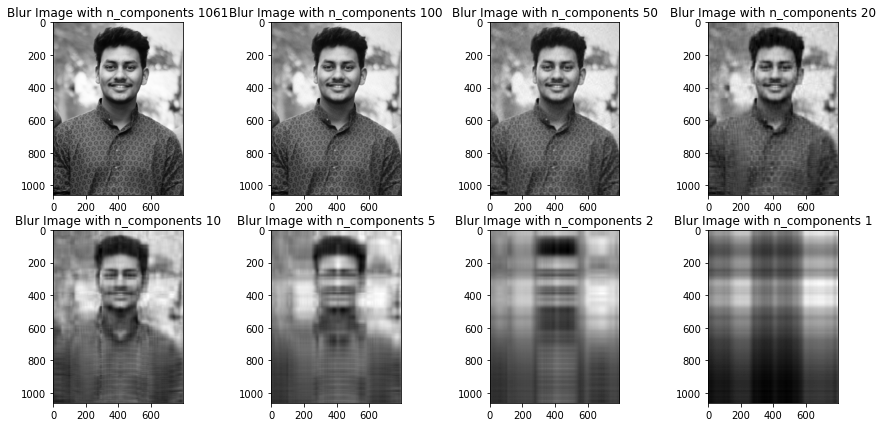

In [13]:
comps=[U.shape[0],100,50,20,10,5,2,1]
fig=plt.figure(figsize=(15,7))
for i in range(len(comps)):
    trans_image=U[:,:comps[i]]@ np.diag(S[:comps[i]]) @ V[:comps[i],:]
    plt.subplot(2,4,i+1)
    plt.imshow(trans_image,cmap="gray")
    plt.title("Blur Image with n_components "+str(comps[i]))